# Group 1 Capstone Project Work
### Make sure to make / checkout your own branch before making changes

# Maddie Hince

In [318]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
                              
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter= '\t')
                            
reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding = 'latin')

movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
                            
movie_budgets_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz",index_col=0)

conn = sqlite3.connect('zippedData/im.db')



# Cat Murad

# Elijah Soba

# Luis Estrada 

# Kilmar Lazo 

# Michael Eugene

In [319]:
df = movie_budgets_df

In [320]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [321]:
df.head()

release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget domestic_gross worldwide_gross  
id                                                   
1       $425,000,000   $760,507,625  $2,776,345,279  
2       $410,600,000   $241,063,875  $1,045,663,875  
3       $350,000,000    $42,762,350    $149,762,350  
4       $330,600,000   $459,005,868  $1,403,013,963  
5       $317,000,000   $620,181,382  $1,316,721,747

In [322]:
df.sort_values(['domestic_gross','production_budget'], ascending=(False,False)).head(10)

release_date                         movie production_budget  \
id                                                                 
12   Jul 4, 2008  AstÃ©rix aux Jeux Olympiques      $113,500,000   
6   Feb 11, 2011             Gnomeo and Juliet       $36,000,000   
43   Aug 3, 2018             Christopher Robin       $75,000,000   
74   Jun 4, 1999                   Desert Blue        $5,000,000   
8   Jun 13, 1997                      Hercules       $70,000,000   
43  Jul 30, 1999              Twin Falls Idaho          $500,000   
9   Mar 22, 2013            Olympus Has Fallen       $70,000,000   
4   Jun 28, 1978               Heaven Can Wait       $15,000,000   
29  Jan 14, 2011              The Green Hornet      $110,000,000   
99   Apr 9, 2010                    Date Night       $55,000,000   

   domestic_gross worldwide_gross  
id                                 
12       $999,811    $132,999,811  
6     $99,967,670    $193,737,977  
43    $99,215,042    $197,504,758  
74        $99,147         $99,147  
8     $99,112,101    $250,700,000  
43       $985,341      $1,027,228  
9     $98,927,592    $172,878,928  
4     $98,800,000     $98,800,000  
29    $98,780,042    $229,155,503  
99    $98,711,404    $152,269,033

In [323]:
df = df.apply(lambda x: x.str.replace(',',''))
df['domestic_gross'] = df['domestic_gross'].fillna(0.0).str.replace('[$,]', '').astype('float')

In [324]:
df['domestic_gross'] = df['domestic_gross'].replace(',', '')
df['domestic_gross'] = df['domestic_gross'].replace('$', '')
df['domestic_gross']

id
1     760507625.0
2     241063875.0
3      42762350.0
4     459005868.0
5     620181382.0
         ...     
78            0.0
79        48482.0
80         1338.0
81            0.0
82       181041.0
Name: domestic_gross, Length: 5782, dtype: float64

In [325]:
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget']

id
1     425000000
2     410600000
3     350000000
4     330600000
5     317000000
        ...    
78         7000
79         6000
80         5000
81         1400
82         1100
Name: production_budget, Length: 5782, dtype: object

In [326]:
df = df.apply(lambda x: x.replace('$',''))
df['production_budget'] = df['production_budget'].fillna(0.0).replace('[$,]', '').astype('float')

In [327]:
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['worldwide_gross']

id
1     2776345279
2     1045663875
3      149762350
4     1403013963
5     1316721747
         ...    
78             0
79        240495
80          1338
81             0
82        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [328]:
df = df.apply(lambda x: x.replace('$',''))
df['worldwide_gross'] = df['worldwide_gross'].fillna(0.0).replace('[$,]', '').astype('float')

In [330]:
sorted_df=df.sort_values(by ='production_budget', ascending = False)
sorted_df.head(15)

release_date                                        movie  \
id                                                             
1   Dec 18 2009                                       Avatar   
2   May 20 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7 2019                                 Dark Phoenix   
4    May 1 2015                      Avengers: Age of Ultron   
5   Dec 15 2017            Star Wars Ep. VIII: The Last Jedi   
6   Dec 18 2015         Star Wars Ep. VII: The Force Awakens   
7   Apr 27 2018                       Avengers: Infinity War   
8   May 24 2007   Pirates of the Caribbean: At Worldâs End   
9   Nov 17 2017                               Justice League   
10   Nov 6 2015                                      Spectre   
11  Jul 20 2012                        The Dark Knight Rises   
12  May 25 2018                      Solo: A Star Wars Story   
13   Jul 2 2013                              The Lone Ranger   
14   Mar 9 2012                                  John Carter   
15  Nov 24 2010                                      Tangled   

    production_budget  domestic_gross  worldwide_gross  
id                                                      
1         425000000.0     760507625.0     2.776345e+09  
2         410600000.0     241063875.0     1.045664e+09  
3         350000000.0      42762350.0     1.497624e+08  
4         330600000.0     459005868.0     1.403014e+09  
5         317000000.0     620181382.0     1.316722e+09  
6         306000000.0     936662225.0     2.053311e+09  
7         300000000.0     678815482.0     2.048134e+09  
8         300000000.0     309420425.0     9.634204e+08  
9         300000000.0     229024295.0     6.559452e+08  
10        300000000.0     200074175.0     8.796209e+08  
11        275000000.0     448139099.0     1.084439e+09  
12        275000000.0     213767512.0     3.931513e+08  
13        275000000.0      89302115.0     2.600021e+08  
14        275000000.0      73058679.0     2.827781e+08  
15        260000000.0     200821936.0     5.864772e+08

In [331]:
df['domestic_gross'] = df['domestic_gross'].astype('str') 

In [332]:
float(df['domestic_gross'].iloc[0].replace(',',''))


760507625.0

In [333]:
my_fn =lambda x:float(x.replace(',',''))

In [334]:
df["domestic_gross"] =df["domestic_gross"].map(my_fn) 

In [335]:
df["domestic_gross"].dtype

dtype('float64')

In [336]:
df["worldwide_gross"].dtype

dtype('float64')

In [337]:
df['production_budget'].dtype

dtype('float64')

In [338]:
sorted_df=df.sort_values(by ='domestic_gross', ascending = False)
sorted_df.head(15)

release_date                                 movie  production_budget  \
id                                                                         
6   Dec 18 2015  Star Wars Ep. VII: The Force Awakens        306000000.0   
1   Dec 18 2009                                Avatar        425000000.0   
42  Feb 16 2018                         Black Panther        200000000.0   
7   Apr 27 2018                Avengers: Infinity War        300000000.0   
43  Dec 19 1997                               Titanic        200000000.0   
34  Jun 12 2015                        Jurassic World        215000000.0   
27   May 4 2012                          The Avengers        225000000.0   
5   Dec 15 2017     Star Wars Ep. VIII: The Last Jedi        317000000.0   
44  Jun 15 2018                         Incredibles 2        200000000.0   
75  Jul 18 2008                       The Dark Knight        185000000.0   
45  Dec 16 2016          Rogue One: A Star Wars Story        200000000.0   
35  Mar 17 2017                  Beauty and the Beast        160000000.0   
46  Jun 17 2016                          Finding Dory        200000000.0   
4   May 19 1999   Star Wars Ep. I: The Phantom Menace        115000000.0   
65  May 25 1977          Star Wars Ep. IV: A New Hope         11000000.0   

    domestic_gross  worldwide_gross  
id                                   
6      936662225.0     2.053311e+09  
1      760507625.0     2.776345e+09  
42     700059566.0     1.348258e+09  
7      678815482.0     2.048134e+09  
43     659363944.0     2.208208e+09  
34     652270625.0     1.648855e+09  
27     623279547.0     1.517936e+09  
5      620181382.0     1.316722e+09  
44     608581744.0     1.242521e+09  
75     533720947.0     1.001996e+09  
45     532177324.0     1.049103e+09  
35     504014165.0     1.259200e+09  
46     486295561.0     1.021215e+09  
4      474544677.0     1.027045e+09  
65     460998007.0     7.865980e+08

In [339]:
sorted_df=df.sort_values(by ='production_budget', ascending = False)
sorted_df.head(15)

release_date                                        movie  \
id                                                             
1   Dec 18 2009                                       Avatar   
2   May 20 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7 2019                                 Dark Phoenix   
4    May 1 2015                      Avengers: Age of Ultron   
5   Dec 15 2017            Star Wars Ep. VIII: The Last Jedi   
6   Dec 18 2015         Star Wars Ep. VII: The Force Awakens   
7   Apr 27 2018                       Avengers: Infinity War   
8   May 24 2007   Pirates of the Caribbean: At Worldâs End   
9   Nov 17 2017                               Justice League   
10   Nov 6 2015                                      Spectre   
11  Jul 20 2012                        The Dark Knight Rises   
12  May 25 2018                      Solo: A Star Wars Story   
13   Jul 2 2013                              The Lone Ranger   
14   Mar 9 2012                                  John Carter   
15  Nov 24 2010                                      Tangled   

    production_budget  domestic_gross  worldwide_gross  
id                                                      
1         425000000.0     760507625.0     2.776345e+09  
2         410600000.0     241063875.0     1.045664e+09  
3         350000000.0      42762350.0     1.497624e+08  
4         330600000.0     459005868.0     1.403014e+09  
5         317000000.0     620181382.0     1.316722e+09  
6         306000000.0     936662225.0     2.053311e+09  
7         300000000.0     678815482.0     2.048134e+09  
8         300000000.0     309420425.0     9.634204e+08  
9         300000000.0     229024295.0     6.559452e+08  
10        300000000.0     200074175.0     8.796209e+08  
11        275000000.0     448139099.0     1.084439e+09  
12        275000000.0     213767512.0     3.931513e+08  
13        275000000.0      89302115.0     2.600021e+08  
14        275000000.0      73058679.0     2.827781e+08  
15        260000000.0     200821936.0     5.864772e+08

In [340]:
sorted_df=df.sort_values(by ='worldwide_gross', ascending = False)
sorted_df.head(15)

release_date                                          movie  \
id                                                               
1   Dec 18 2009                                         Avatar   
43  Dec 19 1997                                        Titanic   
6   Dec 18 2015           Star Wars Ep. VII: The Force Awakens   
7   Apr 27 2018                         Avengers: Infinity War   
34  Jun 12 2015                                 Jurassic World   
67   Apr 3 2015                                      Furious 7   
27   May 4 2012                                   The Avengers   
4    May 1 2015                        Avengers: Age of Ultron   
42  Feb 16 2018                                  Black Panther   
61  Jul 15 2011  Harry Potter and the Deathly Hallows: Part II   
5   Dec 15 2017              Star Wars Ep. VIII: The Last Jedi   
13  Jun 22 2018                 Jurassic World: Fallen Kingdom   
56  Nov 22 2013                                         Frozen   
35  Mar 17 2017                           Beauty and the Beast   
44  Jun 15 2018                                  Incredibles 2   

    production_budget  domestic_gross  worldwide_gross  
id                                                      
1         425000000.0     760507625.0     2.776345e+09  
43        200000000.0     659363944.0     2.208208e+09  
6         306000000.0     936662225.0     2.053311e+09  
7         300000000.0     678815482.0     2.048134e+09  
34        215000000.0     652270625.0     1.648855e+09  
67        190000000.0     353007020.0     1.518723e+09  
27        225000000.0     623279547.0     1.517936e+09  
4         330600000.0     459005868.0     1.403014e+09  
42        200000000.0     700059566.0     1.348258e+09  
61        125000000.0     381193157.0     1.341693e+09  
5         317000000.0     620181382.0     1.316722e+09  
13        170000000.0     417719760.0     1.305773e+09  
56        150000000.0     400738009.0     1.272470e+09  
35        160000000.0     504014165.0     1.259200e+09  
44        200000000.0     608581744.0     1.242521e+09

In [347]:
sorted_df["box_office_ratio"]= sorted_df['production_budget'] / sorted_df['worldwide_gross']
print('Updated DF:')
print(sorted_df)

Updated DF:
   release_date                                 movie  production_budget  \
id                                                                         
1   Dec 18 2009                                Avatar        425000000.0   
43  Dec 19 1997                               Titanic        200000000.0   
6   Dec 18 2015  Star Wars Ep. VII: The Force Awakens        306000000.0   
7   Apr 27 2018                Avengers: Infinity War        300000000.0   
34  Jun 12 2015                        Jurassic World        215000000.0   
..          ...                                   ...                ...   
75  Dec 31 2005                       Insomnia Manica           500000.0   
74  Jul 17 2012                       Girls Gone Dead           500000.0   
73   Apr 3 2012                         Enter Nowhere           500000.0   
72  Dec 31 2010                                Drones           500000.0   
69  Dec 12 2008                The Kings of Appletown          7000000.0   


In [350]:
sorted_df.head()

release_date                                 movie  production_budget  \
id                                                                         
1   Dec 18 2009                                Avatar        425000000.0   
43  Dec 19 1997                               Titanic        200000000.0   
6   Dec 18 2015  Star Wars Ep. VII: The Force Awakens        306000000.0   
7   Apr 27 2018                Avengers: Infinity War        300000000.0   
34  Jun 12 2015                        Jurassic World        215000000.0   

    domestic_gross  worldwide_gross  box_office_ratio  
id                                                     
1      760507625.0     2.776345e+09          0.153079  
43     659363944.0     2.208208e+09          0.090571  
6      936662225.0     2.053311e+09          0.149028  
7      678815482.0     2.048134e+09          0.146475  
34     652270625.0     1.648855e+09          0.130394

In [341]:
my_fn =lambda x:float(x)


In [342]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

release_date                                        movie  \
id                                                             
1    2009-12-18                                       Avatar   
2    2011-05-20  Pirates of the Caribbean: On Stranger Tides   
3    2019-06-07                                 Dark Phoenix   
4    2015-05-01                      Avengers: Age of Ultron   
5    2017-12-15            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  
id                                                      
1         425000000.0     760507625.0     2.776345e+09  
2         410600000.0     241063875.0     1.045664e+09  
3         350000000.0      42762350.0     1.497624e+08  
4         330600000.0     459005868.0     1.403014e+09  
5         317000000.0     620181382.0     1.316722e+09

In [305]:
df.sort_values(by='release_date', ascending=True, inplace=True)
df.tail(10)

release_date                   movie  production_budget  domestic_gross  \
id                                                                           
8    2019-11-22      The Rhythm Section         50000000.0             0.0   
81   2019-12-31        Army of the Dead         90000000.0             0.0   
16   2019-12-31                     Eli         11000000.0             0.0   
72   2019-12-31                     355         75000000.0             0.0   
44   2019-12-31        Down Under Cover         40000000.0             0.0   
30   2019-12-31                  Reagan         25000000.0             0.0   
13   2019-12-31              Rogue City         13000000.0             0.0   
36   2020-02-21        Call of the Wild         82000000.0             0.0   
6    2020-12-31  Hannibal the Conqueror         50000000.0             0.0   
95   2020-12-31                Moonfall        150000000.0             0.0   

    worldwide_gross  
id                   
8               0.0  
81              0.0  
16              0.0  
72              0.0  
44              0.0  
30              0.0  
13              0.0  
36              0.0  
6               0.0  
95              0.0

In [306]:
new_df = df[ (df['release_date'] > '2010-01-01') & (df['release_date'] < '2022-08-10')]
print(new_df)

   release_date                   movie  production_budget  domestic_gross  \
id                                                                           
13   2010-01-08         Youth in Revolt         18000000.0      15285588.0   
40   2010-01-08               Leap Year         19000000.0      25918920.0   
67   2010-01-08             Daybreakers         20000000.0      30101577.0   
68   2010-01-15       The Spy Next Door         28000000.0      24307106.0   
36   2010-01-15               Fish Tank          3000000.0        374675.0   
..          ...                     ...                ...             ...   
30   2019-12-31                  Reagan         25000000.0             0.0   
13   2019-12-31              Rogue City         13000000.0             0.0   
36   2020-02-21        Call of the Wild         82000000.0             0.0   
6    2020-12-31  Hannibal the Conqueror         50000000.0             0.0   
95   2020-12-31                Moonfall        150000000.0      

In [307]:
df.dtypes

release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object

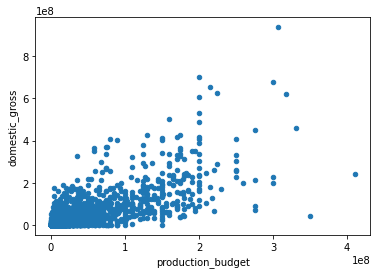

In [308]:
new_df = df[ (df['release_date'] > '2010-01-01') & (df['release_date'] < '2022-08-10')] 
new_df.plot.scatter(x = 'production_budget', y = 'domestic_gross', s = 20);


<AxesSubplot:xlabel='production_budget', ylabel='domestic_gross'>

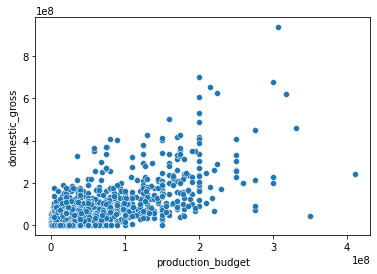

In [309]:
sns.scatterplot(x='production_budget', y='domestic_gross', data=new_df)
